In [64]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

'2.15.0'

In [2]:

(X_train, y_train), (X_test, y_test) = load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [9]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


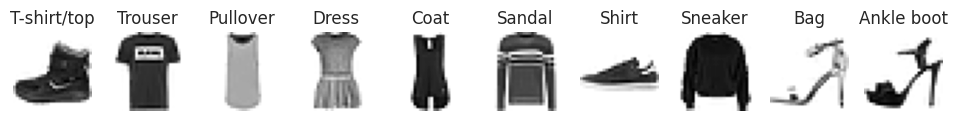

In [10]:
fig = plt.figure(figsize=(12,12))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.axis('off')
  plt.imshow(X_train[i], cmap='gray_r')
  plt.title(class_names[i])
plt.show()

In [11]:
X_train = X_train / 255.
X_test = X_test / 255.

In [76]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
history = model.fit(X_train, y_train, batch_size=10, epochs=15, validation_split=0.2)

Epoch 1/15
4800/4800 [==============================] - 21s 4ms/step - loss: 0.5381 - accuracy: 0.8060 - val_loss: 0.4084 - val_accuracy: 0.8505
Epoch 2/15
4800/4800 [==============================] - 20s 4ms/step - loss: 0.4138 - accuracy: 0.8492 - val_loss: 0.3836 - val_accuracy: 0.8605
Epoch 3/15
4800/4800 [==============================] - 23s 5ms/step - loss: 0.3797 - accuracy: 0.8594 - val_loss: 0.3865 - val_accuracy: 0.8612
Epoch 4/15
4800/4800 [==============================] - 25s 5ms/step - loss: 0.3587 - accuracy: 0.8667 - val_loss: 0.3546 - val_accuracy: 0.8713
Epoch 5/15
4800/4800 [==============================] - 22s 4ms/step - loss: 0.3418 - accuracy: 0.8723 - val_loss: 0.3546 - val_accuracy: 0.8769
Epoch 6/15
4800/4800 [==============================] - 22s 5ms/step - loss: 0.3319 - accuracy: 0.8761 - val_loss: 0.3480 - val_accuracy: 0.8766
Epoch 7/15
4800/4800 [==============================] - 23s 5ms/step - loss: 0.3209 - accuracy: 0.8804 - val_loss: 0.3351 - val_ac

In [78]:
metrics = pd.DataFrame(history.history)

In [79]:
metrics['epoch'] = history.epoch

In [80]:
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.538125,0.805958,0.408390,0.850500,0
1,0.413822,0.849187,0.383587,0.860500,1
2,0.379729,0.859375,0.386513,0.861250,2
3,0.358687,0.866687,0.354643,0.871333,3
4,0.341766,0.872292,0.354614,0.876917,4
5,0.331940,0.876146,0.347980,0.876583,5
6,0.320932,0.880396,0.335131,0.879833,6
7,0.311289,0.883458,0.333266,0.880167,7
8,0.301129,0.887854,0.332701,0.884167,8
9,0.299287,0.886458,0.350061,0.880250,9


In [81]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()


In [82]:

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(test_acc, test_loss)


0.8702999949455261 0.4090282917022705


In [31]:
predictions = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [32]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001547,0.000000,0.002062,0.000000,0.996392
1,0.000002,0.000000,0.996642,0.000000,0.000730,0.000000,0.002625,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.177344,0.000000,0.004780,0.000033,0.000065,0.000003,0.817774,0.000000,0.000001,0.000000


In [84]:
predictions_classes = np.argmax(predictions, axis=1)

In [34]:
predictions_classes

array([9, 2, 1, ..., 8, 1, 5])

In [85]:
errors = pd.DataFrame(np.c_[predictions_classes, y_test], columns=['y_pred','y_test'])

In [86]:
error_df = errors[errors['y_pred']!=errors['y_test']]

In [46]:
error_df

,y_pred,y_test
12,5,7
17,2,4
23,5,9
25,2,4
40,0,6
...,...,...
9961,2,6
9964,5,9
9972,6,2
9977,0,6


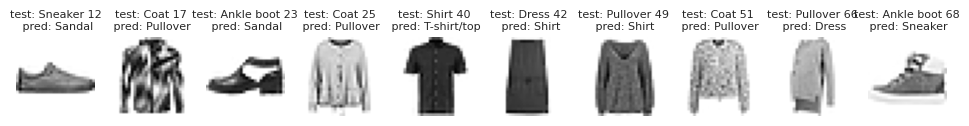

In [87]:
fig = plt.figure(figsize=(12,12))
for i, j in zip(range(10), error_df.index):
  plt.subplot(1,10,i+1)
  plt.axis('off')
  plt.imshow(X_test[j], cmap='gray_r')
  plt.title(f'test: {class_names[y_test[j]]} {j}\n pred: {class_names[predictions_classes[j]]}', fontsize=8)
plt.show()

In [61]:

predictions_cls = np.argmax(predictions, axis=1)
predictions_cls

#@title Wybierz indeks zdjęcia:
idx = 17 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
    color = 'green'
else:
    color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v',
                     marker_color=color))
fig.update_layout(width=800, title=f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

In [62]:

#@title Wybierz indeks zdjęcia:

misclassified = []
for idx, _ in enumerate(X_test):
    if predictions_cls[idx] != y_test[idx]:
        misclassified.append(idx)

index_mapper = {}


for idx, idx_real in enumerate(misclassified):
    index_mapper[idx] = idx_real

idx = 353 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names,
                     y=predictions_df.iloc[index_mapper[idx]],
                     orientation='v',
                     marker_color='red'))

fig.update_layout(width=800,
                  title=(f' Etykieta: {class_names[y_test[index_mapper[idx]]]}'
                      f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}'))
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[index_mapper[idx]] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)